# Importando libraries e o arquivo de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
mkt = pd.read_csv('dados_marketing.csv', encoding='latin-1', sep=';')

# Modelagem de dados

## Observando todos os dados do dataset

### Visão geral

In [3]:
mkt.head()

,ï»¿ID,Ano Nascimento,Escolaridade,Estado Civil,Salario Anual,Filhos em Casa,Adolescentes em Casa,Data Cadastro,Dias Desde Ultima Compra,Gasto com Eletronicos,...,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou,Pais
0,2795,1958,Mestrado,Solteiro,30523.0,2,1,07/01/2020,0,5,...,0,2,7,0,0,0,0,0,0,Chile
1,2285,1954,Mestrado,Casado,36634.0,0,1,05/12/2023,0,213,...,2,5,7,0,0,0,0,0,0,Espanha
2,115,1966,Mestrado,Solteiro,43456.0,0,1,03/02/2023,0,275,...,1,8,5,0,0,0,0,0,0,Argentina
3,10470,1979,Mestrado,Solteiro,40662.0,1,0,03/05/2023,0,40,...,1,3,4,0,0,0,0,0,0,Alemanha
4,4065,1976,Doutorado,Solteiro,49544.0,1,0,02/11/2020,0,308,...,1,8,7,0,0,0,0,0,0,Estados Unidos


### Listando todas as colunas 

In [4]:
mkt.columns

Index(['ï»¿ID', 'Ano Nascimento', 'Escolaridade', 'Estado Civil',
       'Salario Anual', 'Filhos em Casa', 'Adolescentes em Casa',
       'Data Cadastro', 'Dias Desde Ultima Compra', 'Gasto com Eletronicos',
       'Gasto com Brinquedos', 'Gasto com Moveis', 'Gasto com Utilidades',
       'Gasto com Alimentos', 'Gasto com Vestuario',
       'Numero de Compras com Desconto', 'Numero de Compras na Web',
       'Numero de Compras via Catalogo', 'Numero de Compras na Loja',
       'Numero Visitas WebSite Mes', 'Compra na Campanha 1',
       'Compra na Campanha 2', 'Compra na Campanha 3', 'Compra na Campanha 4',
       'Compra na Campanha 5', 'Comprou', 'Pais'],
      dtype='object')

#### Renomeando a coluna ID para não ter problemas na hora de chamar algum código

In [5]:
mkt.rename(columns={'ï»¿ID': 'ID'}, inplace=True)

### Verificando valores indesejados (outliers, duplicados, nulos ou formato incorreto)

### Outliers

<Axes: >

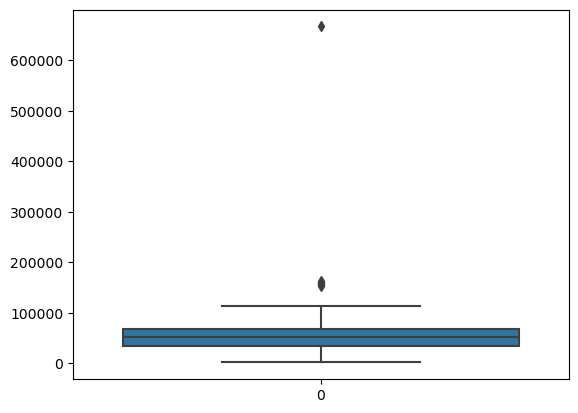

In [6]:
sns.boxplot(mkt['Salario Anual'])

In [7]:
print(mkt['Salario Anual'].describe())

count      1981.000000
mean      52290.852600
std       25484.701911
min        1730.000000
25%       35196.000000
50%       51766.000000
75%       68281.000000
max      666666.000000
Name: Salario Anual, dtype: float64


<br>

<strong><u>Média e Mediana</u></strong>: A <strong>média</strong> do salário anual é <strong>52.290,85</strong> e a <strong>mediana</strong> é <strong>51.766,00</strong>. Isso sugere que a distribuição dos salários é aproximadamente <strong>simétrica</strong>, mas a presença de valores extremos (<strong><u>outliers</u></strong>) pode estar puxando a <strong>média</strong> para cima.

<strong><u>Desvio Padrão</u></strong>: O <strong>desvio padrão</strong> é <strong>25.484,70</strong>, indicando uma alta <strong>variabilidade</strong> nos salários.

<strong><u>Valores Extremos</u></strong>: O valor <strong>mínimo</strong> é <strong>1.730,00</strong> e o valor <strong>máximo</strong> é <strong>666.666,00</strong>, o que confirma a presença de <strong><u>outliers significativos.</u></strong> 


<br>

Vamos substituir os outliers aplicando a <strong>Mediana</strong>

<br>

##### - Tratando outliers

###### - Excluindo o valor discrepante e substituindo pela mediana

In [8]:
median_value = mkt['Salario Anual'].median()
outlier_index = mkt['Salario Anual'].idxmax()
mkt.at[outlier_index, 'Salario Anual'] = median_value
print(mkt['Salario Anual'].describe())

count      1981.000000
mean      51980.453811
std       21418.193577
min        1730.000000
25%       35196.000000
50%       51766.000000
75%       68274.000000
max      162397.000000
Name: Salario Anual, dtype: float64


<Axes: >

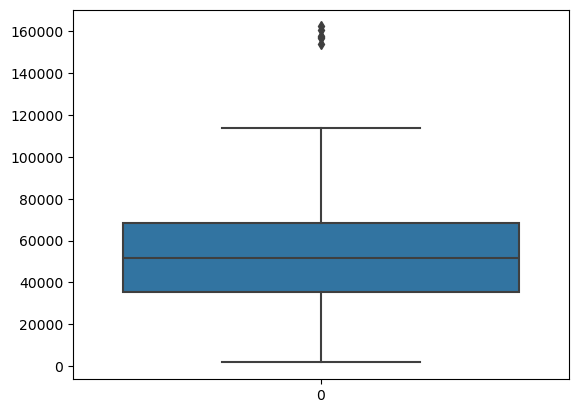

In [9]:
sns.boxplot(mkt['Salario Anual'])

                                                                                                    Dados extremos tratados com sucesso!

### Nulos

In [10]:
mkt.isnull().sum()

ID                                 0
Ano Nascimento                     0
Escolaridade                       0
Estado Civil                       0
Salario Anual                     19
Filhos em Casa                     0
Adolescentes em Casa               0
Data Cadastro                      0
Dias Desde Ultima Compra           0
Gasto com Eletronicos              0
Gasto com Brinquedos               0
Gasto com Moveis                   0
Gasto com Utilidades               0
Gasto com Alimentos                0
Gasto com Vestuario                0
Numero de Compras com Desconto     0
Numero de Compras na Web           0
Numero de Compras via Catalogo     0
Numero de Compras na Loja          0
Numero Visitas WebSite Mes         0
Compra na Campanha 1               0
Compra na Campanha 2               0
Compra na Campanha 3               0
Compra na Campanha 4               0
Compra na Campanha 5               0
Comprou                            0
Pais                               0
d

<Br>

Percebemos que há 19 dados nulos em "Salário Anual", iremos corrigir aplicando a mediana em cima desses dados nulos.

<Br>

In [11]:
mkt['Salario Anual'].fillna(mkt['Salario Anual'].median(), inplace=True)
print(mkt['Salario Anual'].describe())
mkt.isnull().sum()

count      2000.000000
mean      51978.416500
std       21316.173398
min        1730.000000
25%       35409.000000
50%       51766.000000
75%       68117.250000
max      162397.000000
Name: Salario Anual, dtype: float64


C:\Users\èriqy\AppData\Local\Temp\ipykernel_12856\4046880484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mkt['Salario Anual'].fillna(mkt['Salario Anual'].median(), inplace=True)


ID                                0
Ano Nascimento                    0
Escolaridade                      0
Estado Civil                      0
Salario Anual                     0
Filhos em Casa                    0
Adolescentes em Casa              0
Data Cadastro                     0
Dias Desde Ultima Compra          0
Gasto com Eletronicos             0
Gasto com Brinquedos              0
Gasto com Moveis                  0
Gasto com Utilidades              0
Gasto com Alimentos               0
Gasto com Vestuario               0
Numero de Compras com Desconto    0
Numero de Compras na Web          0
Numero de Compras via Catalogo    0
Numero de Compras na Loja         0
Numero Visitas WebSite Mes        0
Compra na Campanha 1              0
Compra na Campanha 2              0
Compra na Campanha 3              0
Compra na Campanha 4              0
Compra na Campanha 5              0
Comprou                           0
Pais                              0
dtype: int64

                                                                                                        Valores nulos corrigidos...

### Duplicados

In [13]:
mkt.duplicated().sum()

0

Não há dados duplicados!

### Mudando o tipo de dados para reconhecimento correto no PowerBI

In [14]:
mkt['Salario Anual'] = mkt['Salario Anual'].astype('Int64')

# Salvando

In [15]:
mkt.to_csv('dados_marketing_final.csv', index=False, encoding='latin-1')